In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('.')
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 加载原始数据
original_dataset = pd.read_pickle('../data/labeled_dataset.pkl')
inloop_labeled = pd.read_csv('../data/inloop_labeled.csv') # spd > 0 and lt < 8

In [31]:
# 数据拼接
dataset = original_dataset[original_dataset['uuid'].isin(inloop_labeled['uuid'])]
dataset_all = pd.merge(dataset, inloop_labeled[['uuid', 'lt']], on='uuid', how='left')
dataset_all = dataset_all.dropna()
dataset_all = dataset_all[dataset_all['tot'] > 0]
dataset_all.tot = dataset_all['tot']*10**-9
dataset_all.tob = dataset_all['tob']*10**-9 

<AxesSubplot:xlabel='lt', ylabel='Count'>

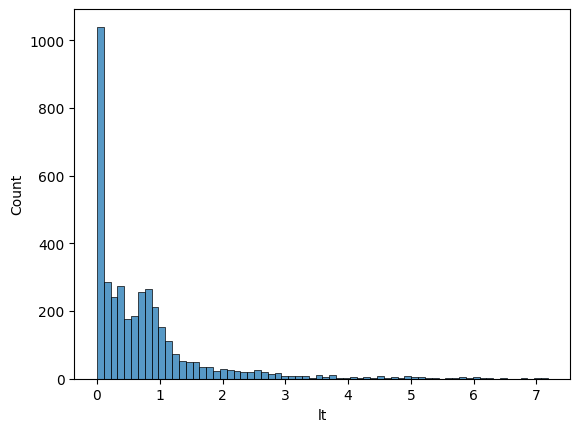

In [63]:
# 特征工程相关操作
# 离散值
sparse_fea = dataset_all.loc[:, 'c_DANADSts':'c_HOSts']
unique_counts = sparse_fea.nunique()
# 连续值 归一化
dense_fea = dataset_all.loc[:, 'l_age':'l_YawRateSAERps']
dense_fea_min = dense_fea.min()
dense_fea_max = dense_fea.max()
dataset_all.loc[:, 'l_age':'l_YawRateSAERps'] = (dense_fea - dense_fea_min) / (dense_fea_max - dense_fea_min)
# 数据集划分
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(dataset_all, test_size=0.2, random_state=42)
mini_df = train_df.iloc[:100, :]
mini_df.to_pickle('../data/mini_lt.pkl')
train_df.to_pickle("../data/train_val_lt.pkl")
temp_df.to_pickle("../data/test_lt.pkl")
sns.histplot(dataset_all['lt'])

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(dataset_all.iloc[:, 4:].corr().round(2), annot=True, cmap='coolwarm')